# Graded Challenge 3
Wirawan Setio Aji<br>
FTDS 014

## Graded Challenge Overview

At this graded challenge we have **9 step** to folow, use  **descriptive statistics** and **inferential statistics** approach to analize the data.
after analyze the data make sure to answer the all **5 Conceptual Questions !**

## Background

I'm a data scientist team member at Austin Smart City have some task to analyze Waste Disposal and waste processing System. as a data scientist team member, I need to use **descriptive statistics** and **inferential statistics** approach to analyze the data.

## Objective


**give an insight** to Austin city's goverment to understand deeper about waste disposal and processing system condition.

## Conceptual Questions

1. Apa perbedaan statistik deskriptif dan inferensial?
2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?
3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
4. Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

## My Works

### Import Libraries

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Data Retrieval

- Query to retrieve data from google [BigQuery](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=austin_waste&t=waste_and_diversion&page=table)

    ```
    SELECT load_time, load_type, load_weight, dropoff_site
    FROM `bigquery-public-data.austin_waste.waste_and_diversion` LIMIT 150000
    ```

- import data into dataframe, show head & tail

In [26]:
df_austin = pd.read_csv('./data/h8dsft_P0GC3_wirawan_setio_aji.csv.csv')
df_austin

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07T11:51:00Z,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11T12:31:00Z,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16T12:58:00Z,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10T11:21:00Z,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03T12:36:00Z,RECYCLING - COMINGLE,1700.0,MRF
...,...,...,...,...
94887,2006-05-12T11:00:00Z,BRUSH,4000.0,ZILKER
94888,2006-05-13T08:30:00Z,BRUSH,4000.0,ZILKER
94889,2006-05-13T10:15:00Z,BRUSH,4000.0,ZILKER
94890,2006-05-13T01:00:00Z,BRUSH,4000.0,ZILKER


### 1. Data Preprocessing

- See if there is **missing value**

In [27]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94892 entries, 0 to 94891
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   load_time     94892 non-null  object 
 1   load_type     94892 non-null  object 
 2   load_weight   90276 non-null  float64
 3   dropoff_site  94892 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.9+ MB


- there are some `load_weight` in the dataframe, check for the rows that have Missing Values

In [28]:
df_null = df_austin.query("load_weight.isnull()")

In [29]:
df_austin[df_austin['load_weight'].isnull()].groupby('load_type')['load_time'].count()

load_type
GARBAGE COLLECTIONS        4
LITTER                     1
RECYCLING - COMINGLE       9
RECYCLING - PAPER          7
SWEEPING                4590
TIRES                      5
Name: load_time, dtype: int64

- Since there is nothing we can do for missing values, we drop all rows at `load_weight`

In [30]:
df_austin.dropna(inplace=True)

In [31]:
df_austin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90276 entries, 0 to 94891
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   load_time     90276 non-null  object 
 1   load_type     90276 non-null  object 
 2   load_weight   90276 non-null  float64
 3   dropoff_site  90276 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.4+ MB


- check if there is 0  at column `load_weight`

In [32]:
df_austin.query("load_weight == 0").groupby('load_type')['load_weight'].count()

load_type
GARBAGE COLLECTIONS           4
RECYCLED METAL                7
RECYCLING - COMINGLE         47
RECYCLING - PAPER            57
RECYCLING - SINGLE STREAM    30
TIRES                         2
Name: load_weight, dtype: int64

- since 0 at every row doesn't make any sense e.g (there are no Tires in this world with 0 on its weight and so to all those rows with other `load_types`) so we **Drop** those rows

In [33]:
df_austin = df_austin.query("load_weight != 0").reset_index(drop=True)


- all missing value has gone, let's change `load_time` data-type **object** into **timestamp** data type

In [34]:

df_austin['load_time'] = pd.to_datetime(df_austin['load_time'])



- Add `year` column to the table

In [35]:


df_austin['year'] = pd.DatetimeIndex(df_austin['load_time']).year

df_austin = df_austin.sort_values('load_time').reset_index(drop=True)
df_austin

,load_time,load_type,load_weight,dropoff_site,year
0,2000-01-26 12:39:00+00:00,RECYCLING - PAPER,2940.0,MRF,2000
1,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF,2004
2,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF,2004
3,2004-10-01 01:00:00+00:00,RECYCLING - COMINGLE,3420.0,MRF,2004
4,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2940.0,MRF,2004
...,...,...,...,...,...
90124,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,5280.0,MRF,2021
90125,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,2700.0,MRF,2021
90126,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,3500.0,MRF,2021
90127,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,2900.0,MRF,2021


- exclude row that have year **2000** because time skip and only have one row of data

In [36]:
df_austin = df_austin.query("year != 2000")
df_austin

,load_time,load_type,load_weight,dropoff_site,year
1,2004-08-30 01:26:00+00:00,RECYCLING - PAPER,8580.0,MRF,2004
2,2004-08-30 01:40:00+00:00,RECYCLING - COMINGLE,4580.0,MRF,2004
3,2004-10-01 01:00:00+00:00,RECYCLING - COMINGLE,3420.0,MRF,2004
4,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2940.0,MRF,2004
5,2004-10-01 01:00:00+00:00,RECYCLING - PAPER,2760.0,MRF,2004
...,...,...,...,...,...
90124,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,5280.0,MRF,2021
90125,2021-07-11 07:00:39+00:00,RECYCLING - COMINGLE,2700.0,MRF,2021
90126,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,3500.0,MRF,2021
90127,2021-07-11 07:01:08+00:00,RECYCLING - COMINGLE,2900.0,MRF,2021


### 2. Data Explore

#### See how garbage collection **increase** its load weight **each year** 

<AxesSubplot:xlabel='year'>

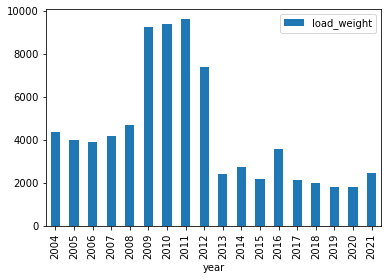

In [37]:
df_austin.groupby(["year"])[['load_weight']].mean().plot(kind='bar')

- total weight of garbage collection from 2004 untill 2011 is way too different, so we see it from 2012 instead

<AxesSubplot:xlabel='year'>

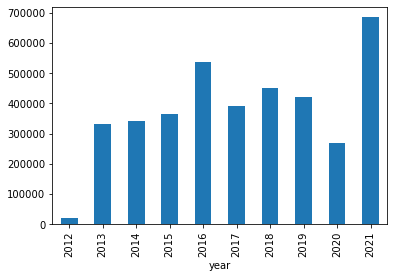

In [38]:
df_austin.query("year > 2011").groupby(["year"])['load_weight'].sum().plot(kind="bar")

if we compare to 1st and 2nd bar chart, this **last decade** , total load weight of waste collection **is reduced**, and **2012** the lowest point.

#### Dropoff Site 

- Dropoff site based on **total frequency** waste collection recieved. as we can see **MRF** does recieved a lot in total since 2004, it is because **MRF** is the main disposal place in Austin since 1970's [source](https://www.texasdisposal.com/about/)

<AxesSubplot:xlabel='dropoff_site'>

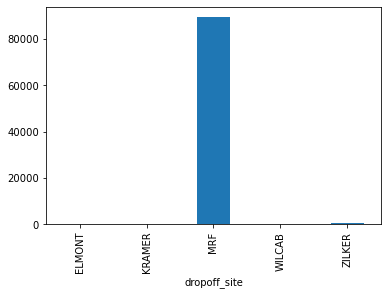

In [39]:
df_austin.groupby('dropoff_site')['load_type'].count().plot(kind='bar')

#### 4. Central Tendency 
look for central tendency on each site

- **Mean** based on weight received by dropoff site

<AxesSubplot:xlabel='dropoff_site'>

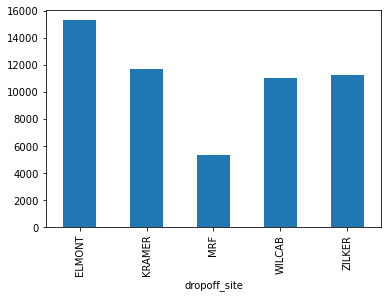

In [40]:
# df_austin.groupby('dropoff_site')['load_weight'].mean().plot(kind='bar')
df_austin.groupby('dropoff_site')['load_weight'].mean().plot(kind='bar')

- **Median** based on weight received by dropoff site

<AxesSubplot:xlabel='dropoff_site'>

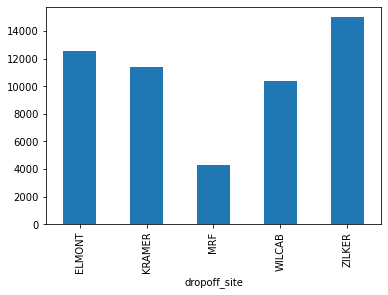

In [41]:
df_austin.groupby('dropoff_site')['load_weight'].median().plot(kind='bar')

but based on the averages of the load weight received using **Mean** and **Median**, **MRF** did not received heavy weight garbages from Austin.

- **Mode** based on weight received by dropoff site

In [42]:
df_austin.groupby(('dropoff_site'))['load_type'].apply(pd.Series.mode)

dropoff_site   
ELMONT        0             SWEEPING
KRAMER        0             SWEEPING
MRF           0    RECYCLING - PAPER
WILCAB        0             SWEEPING
ZILKER        0        YARD TRIMMING
Name: load_type, dtype: object

based on the **mode** of **load_types**, Most of MRF site been received **paper**, other than that, ELMONT, KRAMER, WILCAB have receive mostly **sweeping** and ZILKER is **Yard Triming** 

- Which Dropoff site that still active receiving garbage from austin

In [43]:
df_austin.groupby(('dropoff_site'))['year'].max()

dropoff_site
ELMONT    2014
KRAMER    2006
MRF       2021
WILCAB    2016
ZILKER    2020
Name: year, dtype: int64

In [44]:
df_austin.query("dropoff_site == 'ZILKER'").groupby('year')['year'].count()

year
2006    231
2007    328
2008     91
2015      2
2016      1
2018      2
2020      1
Name: year, dtype: int64

**ELMONT**, **KRAMER** and **WILCAB** hasn't been a dropoff sit for Austin for atleast more than 4 years, especially **KREAMER**, that make **MRF** and **ZILKER** is the most recent dropoff site, but **ZILKER** is rarely received dropoff at last since 2015

In [45]:
df_austin.query("dropoff_site == 'ZILKER'").groupby('load_type')['load_type'].count()

load_type
BRUSH                          186
GARBAGE COLLECTIONS              5
RECYCLING - SINGLE STREAM        1
YARD TRIMMING                  463
YARD TRIMMING - X-MAS TREES      1
Name: load_type, dtype: int64

**ZILKER** mostly handle **Yard Trimming** and **BRUSH**. Yard trimming and brush is related to plantation disposal [source](http://www.fitchburgwi.gov/2568/Brush-Yard-Waste)

- **short fact** about 2 of these special drop off site :

    - MRF : is an acronym for **Materials recovery facility**, MRF is more like a materials recycle facility, and one of them is at Austin Texas [source](https://en.wikipedia.org/wiki/Materials_recovery_facility)
    - MRF is part of sub Division inside TDS (Texas Disposal System) that officialy in business at 2010 [source](https://www.texasdisposal.com/processing/recycling/)
    - ZILKER : is a park that also a drop off point for used christmas trees, old trees, or every plantation related disposal  [source](https://www.austintexas.gov/treerecycling) 

#### 5. Let's See Inside MRF

since **MRF** disposal site at Austin that have recycling facility on mixed garbage. and still run as dropoff site for Austin garbage collection recently.


- let see what type of garbage at **MRF** and find out what garbage mostly been drop off there

<AxesSubplot:xlabel='load_type'>

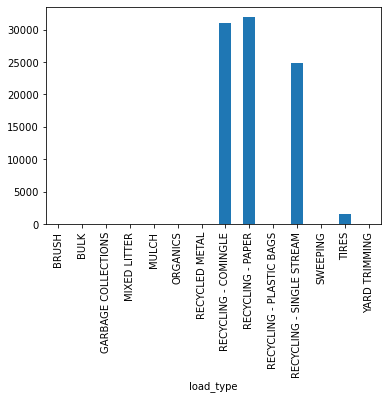

In [46]:
mrf = df_austin.query("dropoff_site =='MRF'")
mrf.groupby('load_type')['load_time'].count().plot(kind='bar')

at **MRF** has received mostly **Comingle** and **Papers** and 3rd position is **single stream**

- also check garbage type and its weight

<AxesSubplot:xlabel='load_type'>

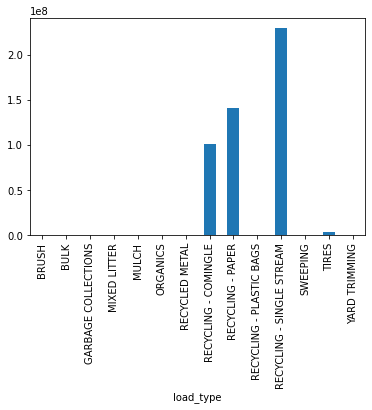

In [47]:
mrf.groupby('load_type')['load_weight'].sum().plot(kind='bar')

- the load type and average on each type

<AxesSubplot:xlabel='load_type'>

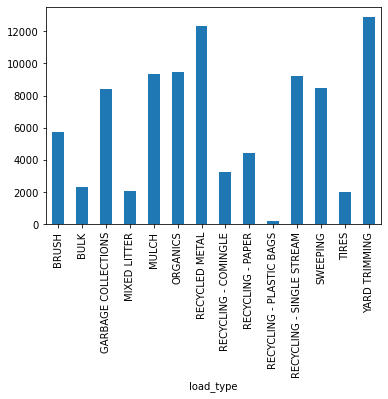

In [48]:
mrf.groupby('load_type')['load_weight'].mean().plot(kind='bar')

**yard trimming** and **Recycled metal** is the heaviest garbage on average. but from the **total sum** single stream has been the haviest

In [49]:
print("total weight mean : ",mrf['load_weight'].mean())
print("total weight median : ",mrf['load_weight'].median())

total weight mean :  5313.764429042535
total weight median :  4260.0


#### 5. Handling Outliers

- before going into deeper analysis on **outliers data**, let's check on  distribution does **load weight** has

In [50]:
print('Load Weight' + ' skewness: ' + str(mrf['load_weight'].skew()))
print('Load Weight' + ' kurtosis: ' + str(mrf['load_weight'].kurt()))


Load Weight skewness: 1.0031565276916947
Load Weight kurtosis: 0.16771656203681307


- **load weight** does have skewed distribution that have **1.003 skewness** so, we have to use **inter-quantile Etreme cases Analysis** to detecting outliers because the skewness > 1

In [60]:
# look for inter quntile .25,.5,.75
q1,q2,q3 = mrf['load_weight'].quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
upper = q3 + (iqr *3)
lower = q1 - (iqr *3)

# filter out the outliers only
outliers = mrf.query("load_weight > @upper or load_weight < @lower")
#count percentage
out_percent = outliers['load_time'].count()/mrf['load_weight'].count()
# mrf data Trimming outliers
mrf_clean =mrf.query("load_weight <= @upper and load_weight >= @lower")
print("percentage of outliers data is",out_percent,"%")
print("total outliers is ",outliers['load_time'].count())

# mean 5313.764429042535, median 4260.0 with outliers

print ("mean load weight with outliers :",mrf['load_weight'].mean())
print ("median load weight with outliers :",mrf['load_weight'].median())

print ("mean load weight without outliers :",mrf_clean['load_weight'].mean())
print ("median load weight without outliers :",mrf_clean['load_weight'].median())


percentage of outliers data is 0.0001453244648147113 %
total outliers is  13
mean load weight with outliers : 5313.764429042535
median load weight with outliers : 4260.0
mean load weight without outliers : 5311.062107287404
median load weight without outliers : 4260.0


- the **mean** after **Trimming** the outliers is **5311.062107287404**, with outliers the mean is **5313.764429042535** not too different, only losing almost 3 point before the outliers has filtered out

#### 6. Variance and Standard Deviation

- See the **Variance and Standard Deviation** of **Load Weight** for **MRF** data without outliers

Load weight variance is 13433900.385595031
Load weight standard deviation is 3665.2285584387546


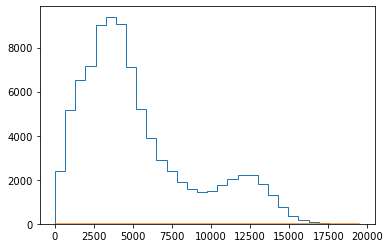

In [52]:
variance = mrf_clean['load_weight'].var()
std_deviation = mrf_clean['load_weight'].std()

print("Load weight variance is", variance)
print("Load weight standard deviation is", std_deviation)

density = stats.gaussian_kde(mrf_clean['load_weight'])
n, x, _ = plt.hist(mrf_clean['load_weight'], histtype='step', bins=30)  
plt.plot(x, density(x)*6)
plt.show()


from the standart deviation on column **load weight** the site  **MRF** has received ton of variation weight load 

#### 7. About New Dropoff Site
The City Goverment of Austin will build a new dropoff site, give a sugestion for how large the capacity for this new site

use all site to reference 

- **Confidence Interval**

we use data only from **MRF** site, because most of them has been not receive any garbage collection from Austin for more than 4 years except for **ZILKER**, but ZILKER is a dropoff site specialize for plantation related garbages, and **MRF** mostly handle mixed daily garbage [source about zilker](https://www.austintexas.gov/treerecycling)

In [62]:
# normalize data and use 0.9 convidence to calculate the convidence interval 
ci = stats.norm.interval(0.90, mrf_clean['load_weight'].mean(), mrf_clean['load_weight'].std())
ci[1]

11339.826595241506

In [63]:
mrf_clean['load_weight'].mean()

5311.062107287404

we give sugestion for City Goverment of Austin to build new sit with **11339.827 capacity**

#### 8. Hypothesis Testing

I want to make hypothesis about the most frequently load_type with the it's average weight in the last 5 year at **MRF**


In [54]:
mrf_clean.query("year >= 2016").groupby('year')['load_type'].apply(pd.Series.mode)

year   
2016  0    TIRES
2017  0    TIRES
2018  0    TIRES
2019  0    TIRES
2020  0    TIRES
2021  0    TIRES
Name: load_type, dtype: object

- Tires has been common load type at **MRF** every year but, what about it's weight?

In [55]:
mrf_clean.query("year >= 2016")['load_weight'].mean()

2226.398839137645

- **Single Sample Hypothesis Testing**<br>
if the average `load_weight` since 2016 is **2226.398**
    - H0 : average load type **TIRES** weight >=  2226.398
    - H1 : Average load type **TIRES** weight < 2226.398

In [56]:
# define tires load_weight column last 5 years
tires = mrf_clean.query("year >= 2016 & load_type == 'TIRES'")['load_weight']
t_stat,p_val = stats.ttest_1samp(tires, 2226.398)

print('P-value:',(p_val/2).real) #The p-value divided by 2 since it's a 
print('t-statistics:',t_stat)

P-value: 2.624024970260154e-11
t-statistics: -6.632120329253185


use **confidence threshold** of 90% <br>
**p-value** is 2.624024970260154e-11<br>
and **confidence level** is 10%

c:\Users\ajies\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


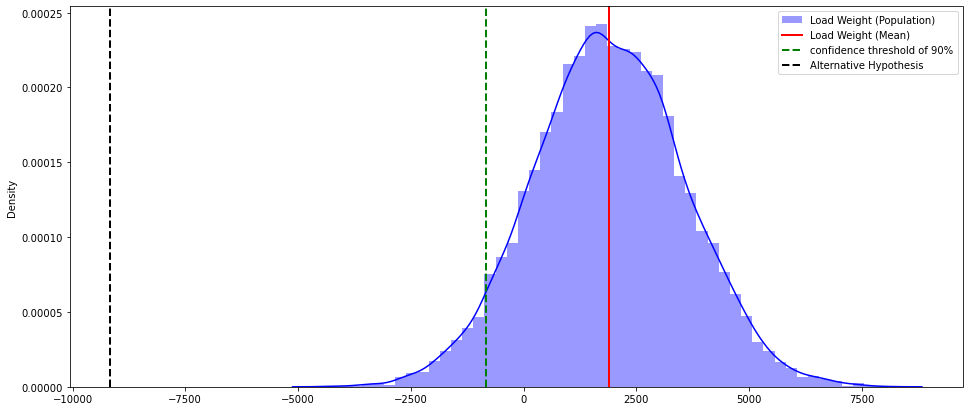

In [67]:
tires_pop = np.random.normal(tires.mean(), tires.std(), 10000)

ci = stats.norm.interval(0.90, tires.mean(), tires.std())

plt.figure(figsize=(16,7))
sns.distplot(tires_pop, label='Load Weight (Population)', color='blue')
plt.axvline(tires.mean(), color='red', linewidth=2, label='Load Weight (Mean)')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 90%')
plt.axvline(tires_pop.mean() + t_stat*tires_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Literally  **H0** has been **rejected** because p-value is less than confidence level, **TIRES** truly is the most common **Load_type**, but it doesn't weight that much, or so to say it **significantly** less than the average

- **ANOVA** Hypothesis testing
    - ANOVA hypothesis testing for daily basis **load_weight** on **each year** from **2016 - 2020** 2021 is not included because the data is not complete(not until december)

In [58]:
avg_d = dict() 
decades = df_austin.query("year >= 2016 & year < 2021")[['load_time','load_weight','year']]

year_list= decades['year'].unique()
year_list
for year in year_list:
    avg_d[str(year)] =  decades.query("year == @year").groupby('load_time').sum()['load_weight']
#     avg_d.get(str(year),)
    # print( "Average load weight at "+ str(year)+ " is", decades[year])

for key,val in avg_d.items():
    print("Daily load weight Average for",key,"is",val.mean())


Daily load weight Average for 2016 is 4159.224806201551
Daily load weight Average for 2017 is 2439.225
Daily load weight Average for 2018 is 2317.523076923077
Daily load weight Average for 2019 is 1936.0825688073394
Daily load weight Average for 2020 is 1972.4160583941605


In [59]:
# list(avg_d.values())
f_stat,p_value = stats.f_oneway(avg_d['2016'],avg_d['2017'],avg_d['2018'],avg_d['2019'],avg_d['2020'])

print("P value : ", p_value)
print("is p value less than 0.05?" ,p_value < 0.05 )

P value :  2.1665160522304607e-12
is p value less than 0.05? True


**P value** is less than **0.05** so the **null hypothesis** has been **rejected**, it means :
- since 2016 until 2020 ,each year the load weight have significant different value

### 9. Conclution

Austin waste disposal and processing system, for waste dispossal, at Austin Texas have 5 different dropoff site, but there are only 2 that still received dropoff recently, they are **MRF** and **ZILKER**, but the **MRF** is the only waste dispossal that have recycling facilities and frequently received dropoff on daily bassist, the load weight from 2004 untill 2010 has been the heviest load weight, and it's dramatically decreased last decade with huge different, we focused on **MRF** because it is the only waste disposal that received wide Variance of load type, and only one that has recycling facility.

at **MRF** their daily **load type** received are **single stream** **comingle**, **papers**, but for the last 5 years **tires** has become the most common dropoff load type at **MRF**, and **yard trimming** for the heaviest average load weight. ,**MRF** also bad wide range of **load weight variation** on daily dropoff. and 

for the new site that goverment wanted to build in the future, our sugestion is to put **11339.827 capacity** of disposal landfill, and also give recycling facility in it, because Austin only have one recycling facility. and from the last 10 years record, the fluctuation on load weight in whole Austin city is very significant, and couldn't predicted. so we have to prepare, other wise we will send

### Conceptual Question

1. what is the different between descriptive and inferential statistics?
    - descriptive statistics is a statistic method that presenting data using graphs,numbers ,and tables
    - inferential statistics is a statistics method that presenting data with the conclutions from the evidence of the samples retrieved from the population
2. which central tendency metrices that appropriate for normal and not-normal distribution, what is the different?
    - for normal distribution best to use **median or mean**
    - for skewed distribution better use **mode or median**
    - when the data is normaly distribute mostly it have mean = median = mode, but for skewed distribution mean != median, but the median is close to the mode rather mean to mode, but aproapriately use mode for extremely skewed distribution, and mode usually around the peak.
3. which technique you choose for handling the outliers, explain!
    - I choose to Trim the outliers, because it doesn't change the average much.
4. what is the concept behind the central tendency, that we can use it for answering step no.7 ?
    - the convidence interval value will gave the save point around the central tendency, when you choose the number around convidence interval value it gave the certainty for the future.
5. which hypothesis testing method did you implement and explain it!
    - I use**1 sample 1 tail**, because it has only 1 kind of data sample, and testing the which hypothesis is **greater or less** from them
    - **ANOVA** testing , because I use **more than 2** group of samples, in this case I use data of each year from the **Load_time** 

### Reference
- https://en.wikipedia.org/wiki/Materials_recovery_facility
- https://www.greenmatters.com/p/what-is-commingled-recycling
- https://www.austintexas.gov/treerecycling